## House Improvement ROI Prediction Model

#### Group 4
#### James Siefert, Liam Hsieh, Panawannage Fernando, and Christopher Moussa

The module below provides a convenience function which calculates how much it would cost to add a second story to a home. It is based off of data from a [2023 article](https://www.angi.com/articles/cost-add-second-story.htm) written by Ginny Bartolone and reviewed by Rober Tschudi.

In [15]:
def add_second_story(sq_feet, details=False):
    if (sq_feet <= 0):
        raise ValueError("square footage must be a positive value")

    # the following breaks down how much each component
    # makes up for the total cost of the second story (per square foot)
    components = {
        "siding": 7.50,
        "framing": 4.50,
        "roofing": 32.50,
        "drywall": 0.53,
        "insulation": 2.80,
        "flooring": 7.80,
        "plumbing": 4.50,
        "staircase": 75.00,
        "painting": .11,
        "hvac": 42.50,
        "lumber": 3.00,
        "electrical_wiring": 7.00   
    }

    # windows and doors are measured by their entirety instead of by
    # square footage
    per_window_cost = 400
    per_door_cost = 270

    # estimate about one window and one door per 500 square feet
    num_windows = num_doors = int(sq_feet / 500)

    # sum the cost of adding windows and doors
    windows = (num_windows * per_window_cost)
    doors = (num_doors * per_door_cost)

    # sum the cost of each component according to the square footage
    total_component_cost = 0
    for key,value in components.items():
        total_component_cost += (value * sq_feet)

    # building permits cost around $1600 on average
    building_permit = 1600

    # estimate labor costs: here, we project that labor costs around 17.5%
    # of the total project cost
    labor = (total_component_cost + windows + doors + building_permit) * .175

    total_cost = total_component_cost + windows + doors + building_permit + labor

    print(f"the cost of adding a {sq_feet} square foot second story would cost around ${total_cost:.0f}.")

    if (details):
        # output a detailed breakdown of the total cost
        print(f"cost breakdown:")
        print("---------------")
        for key,value in components.items():
            print(f"{key}: ${(value * sq_feet):.2f}")

        print()
        print(f"number of windows ({num_windows}): ${windows:.2f}")
        print(f"number of doors ({num_doors}): ${doors:.2f}")

        print()
        print(f"total labor cost: ${labor:.2f}")

        print()
        print(f"building permit cost: ${building_permit:.2f}")

    return total_cost


Below are a couple of simple test cases that demonstrate calling this function:

In [16]:
sq_footage = [800, 900, 1000]

second_story_cost = add_second_story(sq_footage[0])
print()

second_story_cost = add_second_story(sq_footage[1])
print()

second_story_cost = add_second_story(sq_footage[2], details=True)
print()

the cost of adding a 800 square foot second story would cost around $179143.

the cost of adding a 900 square foot second story would cost around $201202.

the cost of adding a 1000 square foot second story would cost around $224049.
cost breakdown:
---------------
siding: $7500.00
framing: $4500.00
roofing: $32500.00
drywall: $530.00
insulation: $2800.00
flooring: $7800.00
plumbing: $4500.00
staircase: $75000.00
painting: $110.00
hvac: $42500.00
lumber: $3000.00
electrical_wiring: $7000.00

number of windows (2): $800.00
number of doors (2): $540.00

total labor cost: $33369.00

building permit cost: $1600.00



This next module provides a convenience function which calculates how much it would cost to add a bedroom to a home. It is based off of data from a [2023 article](https://www.angi.com/articles/cost-to-add-a-bedroom.htm) written by Dan Simms.

In [17]:
def print_details(sq_feet, components, windows, labor, building_permit, furnishing):
        # output a detailed breakdown of the total cost
        print(f"cost breakdown:")
        print("---------------")
        for key,value in components.items():
            print(f"{key}: ${(value * sq_feet):.2f}")

        print(f"\nwindow(s) cost: ${windows:.2f}")

        print(f"\ntotal labor cost: ${labor:.2f}")

        print(f"\nbuilding permit cost: ${building_permit:.2f}")

        print(f"\nfurnishing cost: ${furnishing:.2f}")  


def add_bedroom(sq_feet, details=False):
    if (sq_feet <= 0):
        raise ValueError("square footage must be a positive value")

    components = {
        "drywall": 2.00,
        "insulation": 2.80,
        "flooring": 3.70,
        "storage": 11.50,
        "painting": 3.50,
        "drywall": 2.00,
        "hvac": 45.00,
        "electrical_wiring": 4.00,
    }

    # sum the cost of each component according to the square footage
    total_component_cost = 0
    for key,value in components.items():
        total_component_cost += (value * sq_feet)

    # windows are measured by their entirety instead of by square footage;
    # estimate about one window per 500 square feet
    per_window_cost = 400
    num_windows = num_doors = int(sq_feet / 500)

    # sum the cost of adding windows
    windows = (num_windows * per_window_cost)

    # here we assume just one door per bedroom
    doors = 270

    # the average cost of furnishing a bedroom according to the article
    # ranges between $3,000 and $10,000; here, we take the average of the
    # two boundaries and create a simple linear function for calculating
    # the cost of furnishing at about $10/sq foot
    furnishing = 10 * sq_feet

    # building permits cost around $1600 on average
    building_permit = 1600

    # estimate labor costs: here, we project that labor costs around 40%
    # of the total project cost (excluding furnishing)
    labor = (total_component_cost + windows + building_permit) * .40

    total_cost = total_component_cost + windows + doors + building_permit + labor + furnishing

    print(f"the cost of adding a {sq_feet} square foot bedroom would cost around ${total_cost:.0f}.")

    if (details):
        print_details(sq_feet,
                      components,
                      windows,
                      labor,
                      building_permit,
                      furnishing)

    return total_cost


Below are a couple examples of running the `add_bedroom()` function with a couple of different square feet values.

In [18]:
sq_footage = [800, 900, 1000]

for _ in sq_footage:
    bedroom_cost = add_bedroom(_, details=True)
    print("\n\n")

the cost of adding a 800 square foot bedroom would cost around $92270.
cost breakdown:
---------------
drywall: $1600.00
insulation: $2240.00
flooring: $2960.00
storage: $9200.00
painting: $2800.00
hvac: $36000.00
electrical_wiring: $3200.00

window(s) cost: $400.00

total labor cost: $24000.00

building permit cost: $1600.00

furnishing cost: $8000.00



the cost of adding a 900 square foot bedroom would cost around $103420.
cost breakdown:
---------------
drywall: $1800.00
insulation: $2520.00
flooring: $3330.00
storage: $10350.00
painting: $3150.00
hvac: $40500.00
electrical_wiring: $3600.00

window(s) cost: $400.00

total labor cost: $26900.00

building permit cost: $1600.00

furnishing cost: $9000.00



the cost of adding a 1000 square foot bedroom would cost around $115130.
cost breakdown:
---------------
drywall: $2000.00
insulation: $2800.00
flooring: $3700.00
storage: $11500.00
painting: $3500.00
hvac: $45000.00
electrical_wiring: $4000.00

window(s) cost: $800.00

total labor

This next module provides a convenience function which calculates how much it would cost to add a bathroom to a home. It is based off of data from a [2023 article](https://www.angi.com/articles/how-much-does-it-cost-add-bathroom.htm) written by Bry'Ana Arvie.

In [19]:
def print_details(total_component_cost, labor, building_permit):
        # output a detailed breakdown of the total cost
        print(f"cost breakdown:")
        print("---------------")
        print(f"\ntotal component cost: ${total_component_cost:.2f}")

        print(f"\ntotal labor cost: ${labor:.2f}")

        print(f"\nbuilding permit cost: ${building_permit:.2f}")


def add_bathroom(details=False):
    components = {
        "plumbing": 5500,
        "electrical": 1500,
        "shower": 4150,
        "shower liner": 3500,
        "shower door": 950,
        "faucet": 250,
        "bathtub": 3500,
        "toilet": 375,
        "drywall": 1750,
        "tiling": 1900,
        "vanity": 2150,
        "light fixures": 525,
        "towel racks": 60,
    }

    # sum the cost of each component according to the square footage
    total_component_cost = 0
    for key,value in components.items():
        total_component_cost += (value)

    # building permits cost around $1025 on average
    building_permit = 1025

    # estimate labor costs: here, we project that labor costs around 50%
    # of the components cost
    labor = (total_component_cost) * .50

    total_cost = total_component_cost + building_permit + labor

    print(f"the cost of adding a bathroom would cost around ${total_cost:.0f}.")

    if (details):
        print_details(total_component_cost, labor, building_permit)

    return total_cost


Below is an example of running the `add_bathroom()` function.

In [20]:
bathroom_cost = add_bathroom()
print("\n\n")
bathroom_cost = add_bathroom(details=True)

the cost of adding a bathroom would cost around $40190.



the cost of adding a bathroom would cost around $40190.
cost breakdown:
---------------

total component cost: $26110.00

total labor cost: $13055.00

building permit cost: $1025.00


Now, we'll begin creating our linear regression model for the housing price predictions. We'll start by loading the housing price dataset to begin building a model for housing price prediciton. We'll need a couple of modules to accomplish this: `pandas` and `sklearn`. These modules will help us parse, sort, and visualize our data, and later on, train our model using this data.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# load kaggle dataset
data = pd.read_csv("Housing.csv")

# select some relevant columns to start
selected_columns = ["area", "bedrooms", "bathrooms", "stories", "price"]
data = data[selected_columns]

# display the first few rows of the data we parsed
print(data.head())

# check for missing values and handle if needed
data.dropna(inplace=True)

# convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

   area  bedrooms  bathrooms  stories     price
0  7420         4          2        3  13300000
1  8960         4          4        4  12250000
2  9960         3          2        2  12250000
3  7500         4          2        2  12215000
4  7420         4          1        2  11410000


Let's visualize our data to see how our parameters correlate with our data. We first create scatterplot to visualize all of our datapoints based on the area and their respective price. We also create bar graphs for the categorical data: number of bedrooms, number of bathrooms, and number of stories and the average price of the home based on each category. Lastly, we create a correlation heatmap for all of the parameters and their relation to the price of the house.

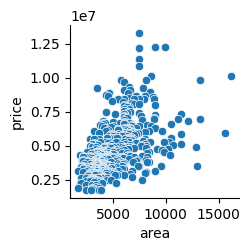

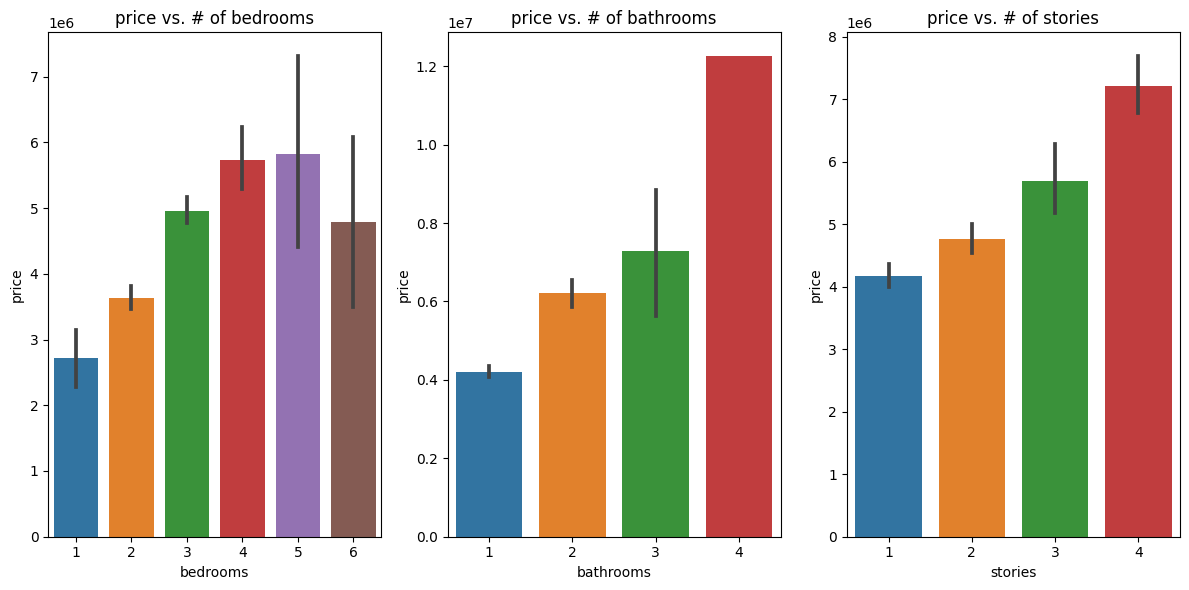

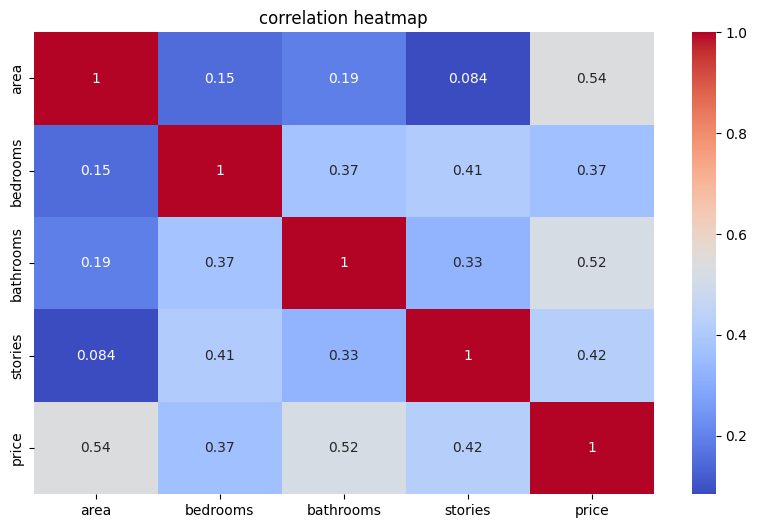

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# use pairplot to visualize the relationships between the square footage
# of the house and the price of the house
sns.pairplot(data, x_vars=["area"], y_vars="price", kind="scatter")
plt.show()

# create bar plots for the categorical parameters
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x="bedrooms", y="price", data=data)
plt.title("price vs. # of bedrooms")

plt.subplot(1, 3, 2)
sns.barplot(x="bathrooms", y="price", data=data)
plt.title("price vs. # of bathrooms")

plt.subplot(1, 3, 3)
sns.barplot(x="stories", y="price", data=data)
plt.title("price vs. # of stories")

plt.tight_layout()
plt.show()

# create correlation heatmap for the different parameters of our model
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()


Now, we'll create our linear regression model for the selected parameters (square footage, number of bedrooms, number of bathrooms, and number of stories) and the target variable (the price of the house) and fit our model to this data. We'll break off a small piece of the Kaggle dataset for testing and gather some performance metrics on our model; namely, the mean squared error (MSE), the variance, and the r-squared value. We'll also create a visualization for the predicted vs. actual price predictions for this test set.

mean squared error: 444376843197.3291
variance: 3498544355820.573
R-squared: 0.8729823612331759


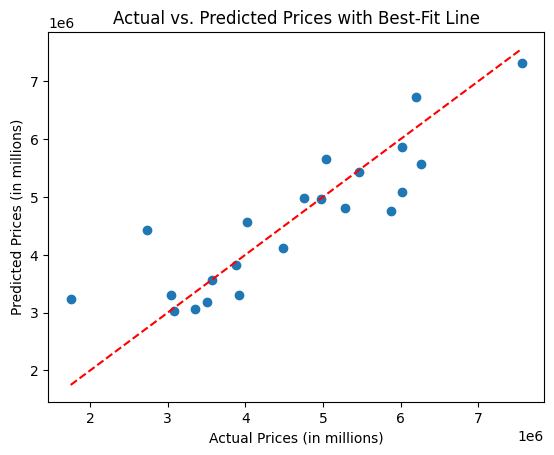

In [23]:
from sklearn.linear_model import LinearRegression

# prepare input variables X and response y
X = data.drop(columns=["price"])
y = data.price

# split data into training and testing sets (use 4% of data for our test set)
housing_train, housing_test, price_train, price_test = train_test_split(X, y, test_size=0.04, random_state=54)

# initialize linear regression model and train it
model = LinearRegression()
model.fit(housing_train, price_train)

# make predictions on the test set
housing_pred = model.predict(housing_test)

# calculate Mean Squared Error (MSE), variance, and R-squared
mse = mean_squared_error(price_test, housing_pred)
variance = y.var()
r_squared = 1 - (mse/variance)

print(f"mean squared error: {mse}")
print(f"variance: {variance}")
print(f"R-squared: {r_squared}")

# visualize actual vs. predicted values with a best-fit line
plt.scatter(price_test, housing_pred)
plt.plot([min(price_test), max(price_test)], [min(price_test), max(price_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices (in millions)")
plt.ylabel("Predicted Prices (in millions)")
plt.title("Actual vs. Predicted Prices with Best-Fit Line")
plt.show()

## Section 2: Cost estimation for addition

### How factor high_end affects the sameple generation for boostraping  
It has heen defined as the mode to shape the distribution
The content of function rv_generatior is shown below:  
```python
import numpy as np
import pandas as pd
from scipy.stats import triang

def rv_generator(low_cost: float, high_cost: float, high_end: int, num: int)->np.ndarray:
    """
    Generate random variables using a triangular distribution.

    Args:
        low_cost (float): Lower limit of triangular distribution.
        high_cost (float): Upper limit of triangular distribution.
        high_end (int): Mode of triangular distribution expressed by a Scale Index between 1 and 10.
        num (int): Number of random numbers to be returned.

    Returns:
        np.ndarray: Array of random numbers generated from the triangular distribution.
    """
    # Calculate parameters for the triangular distribution
    a = low_cost
    b = high_cost
    c = a + (high_end - 1) * (b - a) / 9

    # Create a triangular distribution object
    triangular_dist = triang(c=(c - a) / (b - a), loc=a, scale=(b - a))

    # Generate random samples from the triangular distribution
    samples = triangular_dist.rvs(size=num)
    
    return samples
```

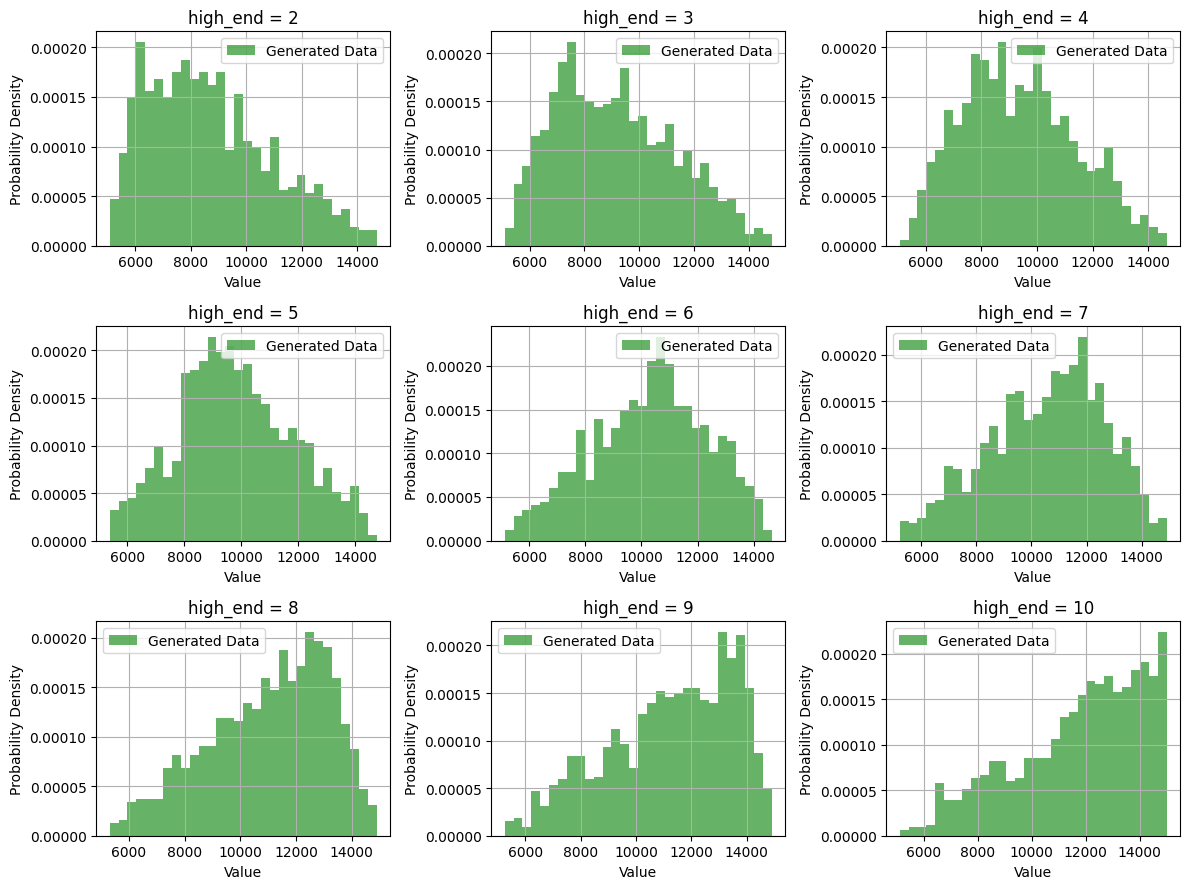

In [4]:
import matplotlib.pyplot as plt
from web_app.utility import rv_generator

def illustrate_samples(samples):
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Generated Data')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title('Histogram of Generated Random Variables')
    plt.legend()
    plt.grid(True)
    
plt.figure(figsize=(12, 9))  # Adjust the figure size as needed

# example parameters for illustration only
low_cost=5000
high_cost=15000
num=1000

for high_end in range(2, 11):
    samples = rv_generator(low_cost, high_cost, high_end, num)
    plt.subplot(3, 3, high_end - 1)  # 3 rows, 3 columns of subplots
    illustrate_samples(samples)
    plt.title(f'high_end = {high_end}')

plt.tight_layout()
plt.show()

### Apply Ridge regression to predict the cost of addition  
We utilized bootstrap to estimate the its performance
Folloing function `pseudo_data` is to return the simulation data as the training set for Ridge regression given by a particular level of factor high_end  
```python 
import pandas as pd
import numpy as np
from web_app.utility import rv_generator


# Create a list to store the results
result_rows = []
def pseudo_data(data, high_end: int):
    # Iterate through each row in the original DataFrame
    for idx, row in data.iterrows():
        samples = rv_generator(row['low cost'], row['high cost'], high_end, 10)
        for sample in samples:
            result_rows.append({
                'bedrooms': row['bedrooms'],
                'bathrooms': row['bathrooms'],
                'kitchen': row['kitchen'],
                'living room': row['living room'],
                'detached': row['detached'],
                'modified sqft': row['modified sqft'],
                'additional sqft': row['additional sqft'],
                '2nd story': row['2nd story'],
                'cost': sample
            })

    # Create a DataFrame from the list of dictionaries
    return pd.DataFrame(result_rows)

```
Following code cell demonstrate how we generate bootstrapping sampling distribution  

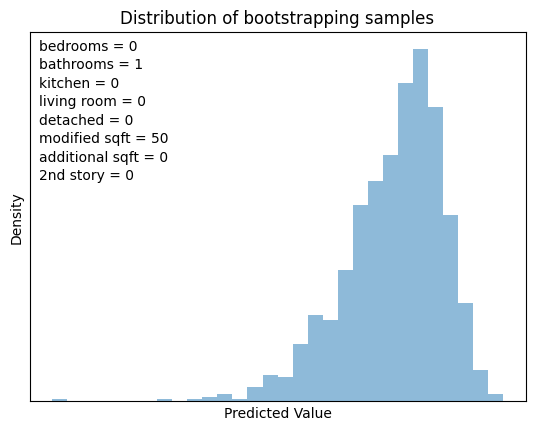

In [19]:
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import warnings
import multiprocessing
from web_app.utility import rv_generator,pseudo_data

warnings.simplefilter("ignore", category=UserWarning)

def boostraping(X, y):
    indices = np.random.choice(len(X), len(X), replace=True)
    X_sample = X.iloc[indices]
    y_sample = y.iloc[indices]
    
    clf = Ridge(alpha=1.0)
    clf.fit(X_sample, y_sample)
    return clf.predict(features_to_predict) 

def generate_predicted_values(seed):
    np.random.seed(seed)
    return boostraping(X, y)

# Load the reference data of cost of addition into a DataFrame
data = pd.read_csv('./web_app/price_data.csv')


# Assume user wants 3 as high_end 
df = pseudo_data(data, high_end=3)
X = df.drop(['cost'], axis=1)
y = df['cost']

# Select a single row from X to use as example features
features_to_predict = [X.iloc[0]]  # .values.reshape(1, -1)  

# Number of bootstrap samples
num_samples = 1000

# Initialize an array to store the predicted values
predicted_values = np.zeros((num_samples))

# Use multiprocessing to generate predicted values in parallel
with multiprocessing.Pool() as pool:
    results = pool.map(generate_predicted_values, range(num_samples))
    predicted_values = np.array(results)

mean_predicted_value = np.mean(predicted_values)
# Plot the distribution of predicted values
# plt.hist(predicted_values, bins=30, density=True, alpha=0.5)
# plt.xlabel(f'Predicted Value for Feature {features_to_predict}')
# plt.ylabel('Density')
# plt.title(f'Distribution of Predicted Values for Feature {features_to_predict}')
# plt.show()

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(predicted_values, bins=30, density=True, alpha=0.5)
ax.set_xlabel(f'Predicted Value')
ax.set_ylabel('Density')
ax.set_title(f'Distribution of bootstrapping samples')

# Add text to the left-top corner
text_strings = [f'{column_name} = {value}' for column_name, value in features_to_predict[0].items()]
for i, text in enumerate(text_strings):
    plt.text(0.02, 0.98 - i * 0.05, text, transform=plt.gca().transAxes, va='top', ha='left')

# Remove x and y ticks for a cleaner appearance
ax.set_xticks([])
ax.set_yticks([])

# Show the figure
plt.show()

# Web App Demo

**should Run Flask App in terminal first**  
according to the source code of the web_app.py, you have to change the working directory as web_app first
```
python web_app.py
```

In [1]:
from IPython.display import IFrame
import ipywidgets as widgets
from IPython.display import display
from PIL import ImageGrab

from PIL import Image
import numpy as np

scale = 0.75 #must greater than zero
image = Image.open('./web_app/static/images/background.jpeg')
url = "http://127.0.0.1:5000"
width, height=np.array(image.size)*scale

IFrame("http://127.0.0.1:5000", width=width, height=height)

# iframe_html = f'<iframe src="{url}" width={width} height={height}></iframe>'
# iframe_widget = widgets.HTML(iframe_html)
# display(iframe_widget)

